In [21]:
# bash commands
!ls
!pip3 install -U textblob
!python -m textblob.download_corpora

Data                                   newfile
Presentation                           sentiment analysis code
README.md                              to_ingest
Sentiment Analysis Covid Vaccine.ipynb vt_cases_deaths
geopy_location_mapping.ipynb           vt_cleaned_sentiment
merge_cases_deaths.ipynb
Requirement already up-to-date: textblob in /Users/federicolomba/opt/anaconda3/lib/python3.8/site-packages (0.15.3)
[nltk_data] Downloading package brown to
[nltk_data]     /Users/federicolomba/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/federicolomba/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/federicolomba/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/federicolomba/nltk_data...
[nltk_data]   Package averaged_perceptron_t

In [22]:
# libraries
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
cd sentiment-analysis-covid-vaccine

/Users/federicolomba/Desktop/USI federico/SP 2021/VISUAL AN/GROUP PROJECT/sentiment-analysis-covid-vaccine


In [33]:
# dataframe
df = pd.read_csv('Data/vaccination_all_tweets_cleaned_with_country.csv')

In [34]:
df.head(10)

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,user_coordinates,user_coordinates2,user_country
0,9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,"[73.0651511, 33.6938118]","33.6938118, 73.0651511",Pakistan
1,12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12 17:45:00,The agency also released new information for h...,NaN,TweetDeck,0,18,False,"[78.6677428, 22.3511148]","22.3511148, 78.6677428",India
2,17,1337783770070409218,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,2020-12-12 15:38:00,"Coronavirus: Iran reports 8,201 new cases, 221...","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False,"[34.9249653, 38.9597594]","38.9597594, 34.9249653",Turkey
3,30,1337760271151063040,Andy Thomas,London,Retweets not necessarily endorsements.,2009-03-07 20:39:15,1151,4301,95963,False,2020-12-12 14:04:37,"@ZubyMusic 6 deaths so far. \nIt's only death,...","['CovidVaccines', 'Pfizervaccine']",Twitter for Android,0,2,False,"[-0.1276474, 51.5073219]","51.5073219, -0.1276474",United Kingdom
4,44,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,2020-12-12 11:55:28,#FDA authorizes #PfizerBioNTech #coronavirus v...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False,"[29.2675469, 26.2540493]","26.2540493, 29.2675469",Egypt
5,45,1340571472025141248,IP_Man,America,"One Man, \nWith One Statistically Impossible G...",2012-06-21 01:41:33,625,477,14475,False,2020-12-20 08:15:20,When The #CovidVaccine \nPoisons Enough Of The...,"['CovidVaccine', 'BellsPalsy']",Twitter Web App,0,0,False,"[5.9799001, 51.4371483]","51.4371483, 5.9799001",Netherlands
6,49,1339822296278519810,IP_Man,America,"One Man, \nWith One Statistically Impossible G...",2012-06-21 01:41:33,625,477,14475,False,2020-12-18 06:38:22,COVID-19: News and updates\npublic questioned ...,NaN,Twitter Web App,0,0,False,"[5.9799001, 51.4371483]","51.4371483, 5.9799001",Netherlands
7,59,1338607616600256513,Roger Simmons,Ontario,NaN,2020-01-03 22:29:02,8,37,658,False,2020-12-14 22:11:40,Will you be taking the COVID-19 vaccine once a...,"['COVID19', 'Pfizer', 'BioNTech', 'vaccine', '...",Twitter for iPhone,0,0,False,"[-86.000977, 50.000678]","50.000678, -86.000977",Canada
8,75,1338574693087936513,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #I...,2012-06-11 13:50:05,3372,1713,119631,False,2020-12-14 20:00:51,#UgurSahin #ozlemtureci the #Muslim Scientists...,"['UgurSahin', 'ozlemtureci', 'Muslim', 'Pfizer...",Twitter for Android,0,0,False,"[78.6677428, 22.3511148]","22.3511148, 78.6677428",India
9,78,1338572995992969217,Toni Kappesz,BERLIN,NaN,2009-06-08 12:38:48,221,483,58673,False,2020-12-14 19:54:06,"Where did the #WarpSpeed money go, if not to t...","['WarpSpeed', 'PfizerBioNTech', 'Moderna', 'Gr...",Twitter for iPhone,0,0,False,"[13.3888599, 52.5170365]","52.5170365, 13.3888599",Germany


# TextBlob study 
https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis

note: the polarity score is a float within the range [-1.0, 1.0]

In [35]:
# TextBlob experiments
TextBlob("I love Astrazeneca!").sentiment # positive
TextBlob("I really do not care about vaccination").sentiment # neutral
TextBlob("Vaccination is a disaster... it is dangerous! do not vaccinate!").sentiment # negative

Sentiment(polarity=-0.9375, subjectivity=0.9)

In [36]:
# requires strictly string, nan are class float
# will produce an error
for line in df['text']:
  if isinstance(line, float):
    print(line)
    break

nan


In [37]:
# new column is created in order to deal with the problem above
# nan in text are substituted with sring with no characters
df['modified_text'] = df['text'].apply(lambda x: '' if isinstance(x, float) else x)

In [38]:
df.head()

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,...,text,hashtags,source,retweets,favorites,is_retweet,user_coordinates,user_coordinates2,user_country,modified_text
0,9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,...,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,"[73.0651511, 33.6938118]","33.6938118, 73.0651511",Pakistan,#CovidVaccine \n\nStates will start getting #C...
1,12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,...,The agency also released new information for h...,NaN,TweetDeck,0,18,False,"[78.6677428, 22.3511148]","22.3511148, 78.6677428",India,The agency also released new information for h...
2,17,1337783770070409218,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,...,"Coronavirus: Iran reports 8,201 new cases, 221...","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False,"[34.9249653, 38.9597594]","38.9597594, 34.9249653",Turkey,"Coronavirus: Iran reports 8,201 new cases, 221..."
3,30,1337760271151063040,Andy Thomas,London,Retweets not necessarily endorsements.,2009-03-07 20:39:15,1151,4301,95963,False,...,"@ZubyMusic 6 deaths so far. \nIt's only death,...","['CovidVaccines', 'Pfizervaccine']",Twitter for Android,0,2,False,"[-0.1276474, 51.5073219]","51.5073219, -0.1276474",United Kingdom,"@ZubyMusic 6 deaths so far. \nIt's only death,..."
4,44,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,...,#FDA authorizes #PfizerBioNTech #coronavirus v...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False,"[29.2675469, 26.2540493]","26.2540493, 29.2675469",Egypt,#FDA authorizes #PfizerBioNTech #coronavirus v...


In [39]:
for line in df['modified_text']:
  if isinstance(line, float):
    print(line)
    break
print('Checked for na.')

Checked for na.


In [40]:
df['text'].head(5)

0    #CovidVaccine \n\nStates will start getting #C...
1    The agency also released new information for h...
2    Coronavirus: Iran reports 8,201 new cases, 221...
3    @ZubyMusic 6 deaths so far. \nIt's only death,...
4    #FDA authorizes #PfizerBioNTech #coronavirus v...
Name: text, dtype: object

In [41]:
# applying textblob model to the data
df['sent_score'] = df['modified_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,...,hashtags,source,retweets,favorites,is_retweet,user_coordinates,user_coordinates2,user_country,modified_text,sent_score
0,9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,"[73.0651511, 33.6938118]","33.6938118, 73.0651511",Pakistan,#CovidVaccine \n\nStates will start getting #C...,0.000000
1,12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,...,NaN,TweetDeck,0,18,False,"[78.6677428, 22.3511148]","22.3511148, 78.6677428",India,The agency also released new information for h...,0.136364
2,17,1337783770070409218,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,...,"['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False,"[34.9249653, 38.9597594]","38.9597594, 34.9249653",Turkey,"Coronavirus: Iran reports 8,201 new cases, 221...",0.068182
3,30,1337760271151063040,Andy Thomas,London,Retweets not necessarily endorsements.,2009-03-07 20:39:15,1151,4301,95963,False,...,"['CovidVaccines', 'Pfizervaccine']",Twitter for Android,0,2,False,"[-0.1276474, 51.5073219]","51.5073219, -0.1276474",United Kingdom,"@ZubyMusic 6 deaths so far. \nIt's only death,...",0.050000
4,44,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False,"[29.2675469, 26.2540493]","26.2540493, 29.2675469",Egypt,#FDA authorizes #PfizerBioNTech #coronavirus v...,0.000000


<AxesSubplot:xlabel='sent_score', ylabel='Density'>

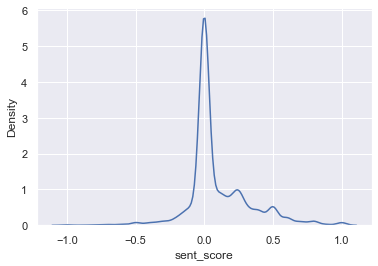

In [42]:
# viz sentiment score
# density plot
sns.set(style="darkgrid")
sns.kdeplot(df['sent_score'])

In [43]:
# creating categorical data for sentiment 
# another idea could to extend the neutral range to an 'intorno' of zero
# namely include every data point in range 0-eps, 0+eps
 
def sentiment_fun(x):
    if x > 0:
        return "positive"
    elif x < 0:
        return "negative"
    else: 
        return "neutral"
df['sentiment'] = df.sent_score.apply(lambda x: sentiment_fun(x))
df["sentiment"]

0         neutral
1        positive
2        positive
3        positive
4         neutral
           ...   
12223     neutral
12224     neutral
12225    positive
12226    negative
12227    positive
Name: sentiment, Length: 12228, dtype: object

In [44]:
df.head()

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,...,source,retweets,favorites,is_retweet,user_coordinates,user_coordinates2,user_country,modified_text,sent_score,sentiment
0,9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,...,Twitter Web App,0,0,False,"[73.0651511, 33.6938118]","33.6938118, 73.0651511",Pakistan,#CovidVaccine \n\nStates will start getting #C...,0.000000,neutral
1,12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,...,TweetDeck,0,18,False,"[78.6677428, 22.3511148]","22.3511148, 78.6677428",India,The agency also released new information for h...,0.136364,positive
2,17,1337783770070409218,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,...,TweetDeck,3,5,False,"[34.9249653, 38.9597594]","38.9597594, 34.9249653",Turkey,"Coronavirus: Iran reports 8,201 new cases, 221...",0.068182,positive
3,30,1337760271151063040,Andy Thomas,London,Retweets not necessarily endorsements.,2009-03-07 20:39:15,1151,4301,95963,False,...,Twitter for Android,0,2,False,"[-0.1276474, 51.5073219]","51.5073219, -0.1276474",United Kingdom,"@ZubyMusic 6 deaths so far. \nIt's only death,...",0.050000,positive
4,44,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,...,Twitter Web App,1,1,False,"[29.2675469, 26.2540493]","26.2540493, 29.2675469",Egypt,#FDA authorizes #PfizerBioNTech #coronavirus v...,0.000000,neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

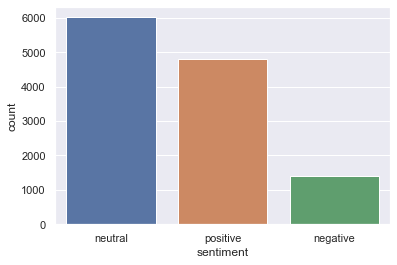

In [45]:
# viz categorical sentiment
# bar plto
sns.countplot(x="sentiment", data=df)

# not many negative tweets... to deepen! 

In [46]:
df[['text', 'sent_score']].sort_values(by='sent_score', ascending=False).head()

,text,sent_score
8103,Chipped and happy! #Moderna,1.0
3272,@ssr99 @KTRTRS Best Islamic Laws\n#MondayMotiv...,1.0
5878,#GlandPharma #stock did best after the company...,1.0
8104,"In the wise words of\nLil Jon, 🎶 ""SHOTS! SHOTS...",1.0
5864,Proud ! ❣\n\nDon't miss the opportunity to get...,1.0


In [47]:
pos = df[['text', 'sent_score']].sort_values(by='sent_score', ascending=False).head()
i = 0
for index, row in pos.iterrows():
  print(row['text'])
  i += 1
  if i > 10:
    break

Chipped and happy! #Moderna
@ssr99 @KTRTRS Best Islamic Laws
#MondayMotivation
#CGBudget2021
#Covaxin
#FastForNation
#HBDMKStalin… https://t.co/qYQRVKX3nf
#GlandPharma #stock did best after the company signed a deal with #Russia to supply the country’s #SputnikV… https://t.co/ApU0yckdBc
In the wise words of
Lil Jon, 🎶 "SHOTS! SHOTS! SHOTS! SHOTS! SHOTS!
SHOTS! EVERYBODY!!!" 🎶

#thepowerofhaiku… https://t.co/f6hyMyoHXt
Proud ! ❣

Don't miss the opportunity to get yourself vaccinated

#CovidVaccine #LargestVaccinationDrive #COVID19… https://t.co/ixjTsJp9PA


In [48]:
df[['text', 'sent_score']].sort_values(by='sent_score', ascending=True).head()

,text,sent_score
8302,Kenya just like Birmingham under the #PeakyBli...,-1.0
574,#PfizerBioNTech #Vaccin #COVID19 #Moderna \nWH...,-1.0
10992,Now go #GetVaccinated ya filthy animals! #Pfi...,-1.0
11150,There can no longer be any doubt whatsoever th...,-1.0
5558,Terrible 😱 #Moderna #VaccinationCovid https://...,-1.0


In [49]:
neg = df[['text', 'sent_score']].sort_values(by='sent_score', ascending=True).head()
i = 0
for index, row in neg.iterrows():
  print(row['text'])
  i += 1
  if i > 10:
    break

Kenya just like Birmingham under the #PeakyBlinders is under a ruthless Cartel... Bailing for literally everything.… https://t.co/74lYWxeI7a
#PfizerBioNTech #Vaccin #COVID19 #Moderna 
WHAT THE FUCK !!!!!!
😂😂😂😂🤣🤣🤣🤣🤣😱😱😱😱😱 https://t.co/NaPnpvhY5W
Now go #GetVaccinated  ya filthy animals! #Pfizer #Moderna #JohnsonandJohnson #AstraZeneca
There can no longer be any doubt whatsoever that those who govern us are irredeemably evil, and that removing them… https://t.co/ia04LOxdTc
Terrible 😱 #Moderna #VaccinationCovid https://t.co/IQ0NfVeMPU


In [57]:
df.to_csv('Data/vt_cleaned_sentiment_with_country.csv', index = False)

In [58]:
df

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,...,source,retweets,favorites,is_retweet,user_coordinates,user_coordinates2,user_country,modified_text,sent_score,sentiment
0,9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,...,Twitter Web App,0,0,False,"[73.0651511, 33.6938118]","33.6938118, 73.0651511",Pakistan,#CovidVaccine \n\nStates will start getting #C...,0.000000,neutral
1,12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,...,TweetDeck,0,18,False,"[78.6677428, 22.3511148]","22.3511148, 78.6677428",India,The agency also released new information for h...,0.136364,positive
2,17,1337783770070409218,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,...,TweetDeck,3,5,False,"[34.9249653, 38.9597594]","38.9597594, 34.9249653",Turkey,"Coronavirus: Iran reports 8,201 new cases, 221...",0.068182,positive
3,30,1337760271151063040,Andy Thomas,London,Retweets not necessarily endorsements.,2009-03-07 20:39:15,1151,4301,95963,False,...,Twitter for Android,0,2,False,"[-0.1276474, 51.5073219]","51.5073219, -0.1276474",United Kingdom,"@ZubyMusic 6 deaths so far. \nIt's only death,...",0.050000,positive
4,44,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,...,Twitter Web App,1,1,False,"[29.2675469, 26.2540493]","26.2540493, 29.2675469",Egypt,#FDA authorizes #PfizerBioNTech #coronavirus v...,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12223,69707,1382253724878344196,Roopam,Ranchi,Be Ur Kind of Crazy....Someone out there will ...,2019-08-19 14:55:44,304,280,87,False,...,Twitter Web App,0,2,False,"[85.3250132, 23.3700354]","23.3700354, 85.3250132",India,Mr. @RahulGandhi it is not because of you but ...,0.000000,neutral
12224,69711,1382250817189597189,moneycontrol,Mumbai,Moneycontrol is India’s No. 1 financial portal...,2009-08-26 07:55:29,1077795,297,1079,True,...,Twitter Web App,2,4,False,"[72.8773928, 19.0759899]","19.0759899, 72.8773928",India,.@viswanath_pilla looks at how #SputnikV stack...,0.000000,neutral
12225,69712,1382250738760384515,ET NOW,India,Youtube: https://t.co/u54RR8zcQ8 Facebook: htt...,2010-12-10 12:49:29,641608,79,3,True,...,Twitter Media Studio,1,10,False,"[78.6677428, 22.3511148]","22.3511148, 78.6677428",India,Watch @drreddys address #SputnikV EUA #LIVE h...,0.136364,positive
12226,69713,1382248484259123205,Russian Mission in Geneva,Geneve,Постпредство России при Отделении ООН и др. ме...,2011-07-26 08:40:47,9862,589,3502,True,...,Twitter for iPhone,2,9,False,"[6.1466014, 46.2017559]","46.2017559, 6.1466014",Switzerland,✅ 🇷🇺#Gamaleya Research Center in cooperation w...,-0.100000,negative


Note: an alternative could be to train a naive bayes classifier. 


